# Visualize Variation between TCGA Facet Outputs

To statistically assess the results of FACETS on TCGA dataset, the standard deviation between non-matching samples SNP and segments were calculated and plotted. Also, the root mean squared error between the non-matching samples SNP and segments compared to the value from the matching sample was compared.

### Load source files

In [2]:
#
# Import source libraries
#
setwd("~/Documents/Git-Projects/Git-Research-Projects/drug-response-prediction")
source("helperFunctions.R")
source("cnProfileVisualizationLibrary.R")
source("visualizeTCGAFacetsVariationLibrary.R")


Loading required package: grid
Loading required package: IRanges
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,
    colSums, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, lengths, Map, mapply, match,
    mget, order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rowMeans, rownames, rowSums, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which, which.max, which.min

Loading required pack

### Visualize SD of SNP and segments for all tumors

The standard deviation between SNPs average around 0.30. While the variation is high, this value may be misleading since variation can also be contributed by other factors such as coverage of each SNP in the normal sequence.

The standard deviation between segments average around 0.05. This value provides a stronger impact since we are directly assessing the results of FACETs. 0.05 is relatively low, but may cause false positives and false negatives when calling amplification and deletion events.

While the standard deviation is reasonable, we need to assess the MSE to look for any bias in the non-matching sample segments.

[1] "The mean SD for segments of tumorID=2 is SD=0.0579583383546926"
[1] "The mean SD for SNPs of tumorID=2 is SD=0.314733540869902"
[1] "The mean SD for segments of tumorID=3 is SD=0.053990463506508"
[1] "The mean SD for SNPs of tumorID=3 is SD=0.362285917247251"


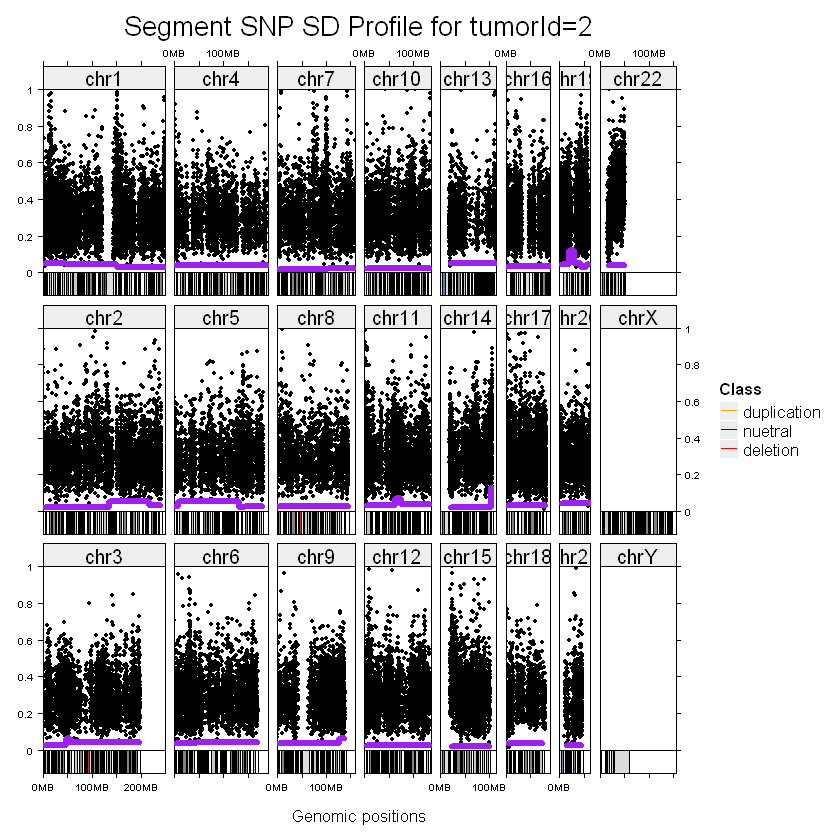

[1] "The mean SD for segments of tumorID=4 is SD=0.0613734448879666"
[1] "The mean SD for SNPs of tumorID=4 is SD=0.313590757678544"


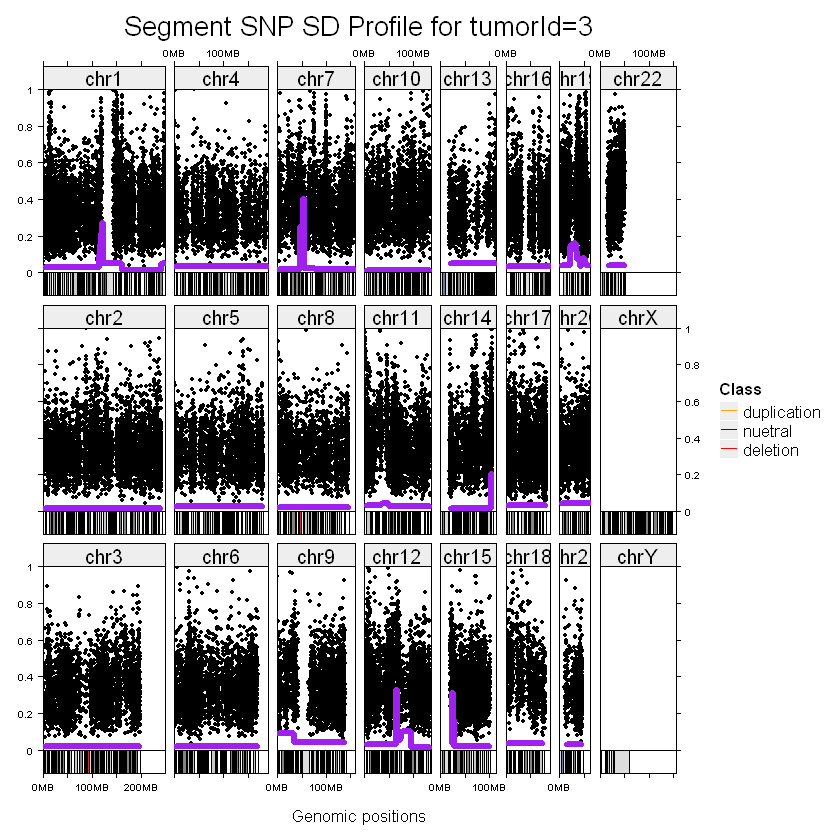

[1] "The mean SD for segments of tumorID=5 is SD=0.053169994722134"
[1] "The mean SD for SNPs of tumorID=5 is SD=0.348012692032342"


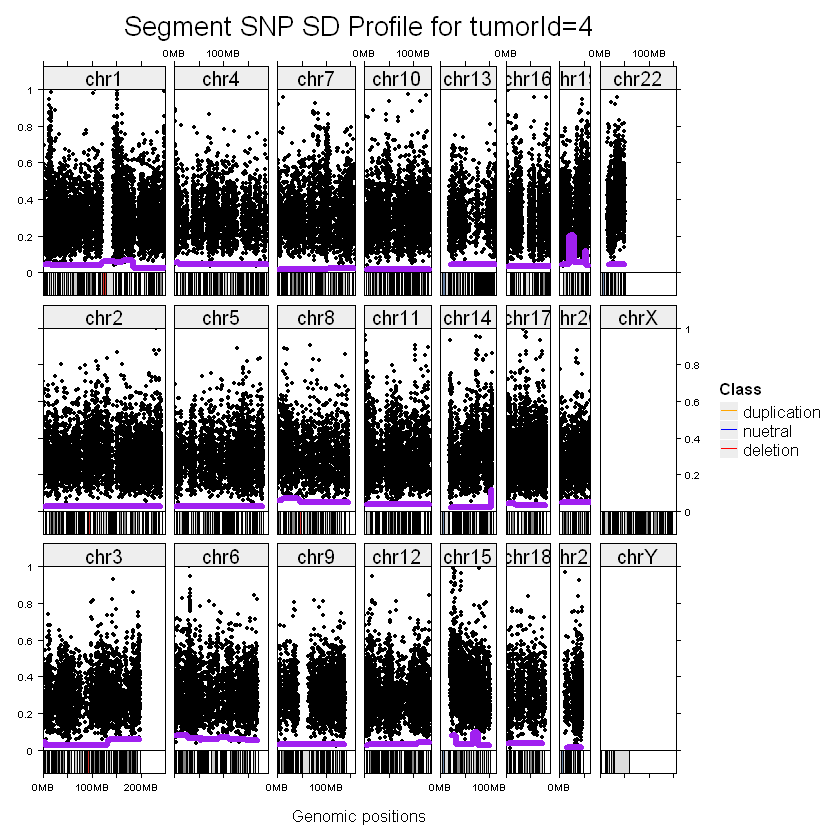

[1] "The mean SD for segments of tumorID=6 is SD=0.0563812945086626"
[1] "The mean SD for SNPs of tumorID=6 is SD=0.343984354190664"


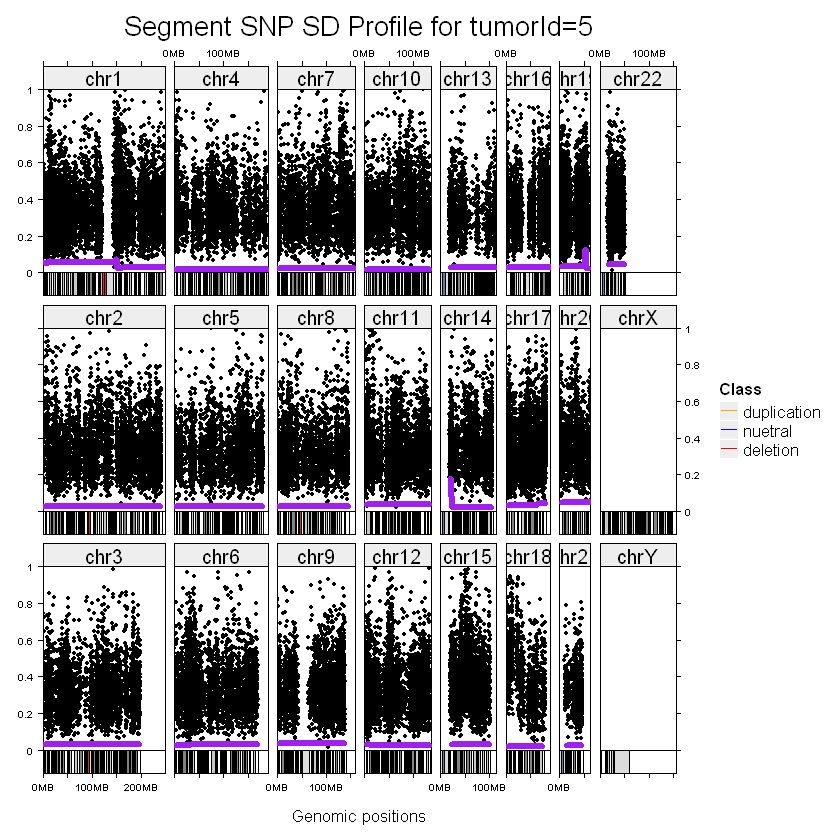

[1] "The mean SD for segments of tumorID=7 is SD=0.0600302426055856"
[1] "The mean SD for SNPs of tumorID=7 is SD=0.386453481633826"


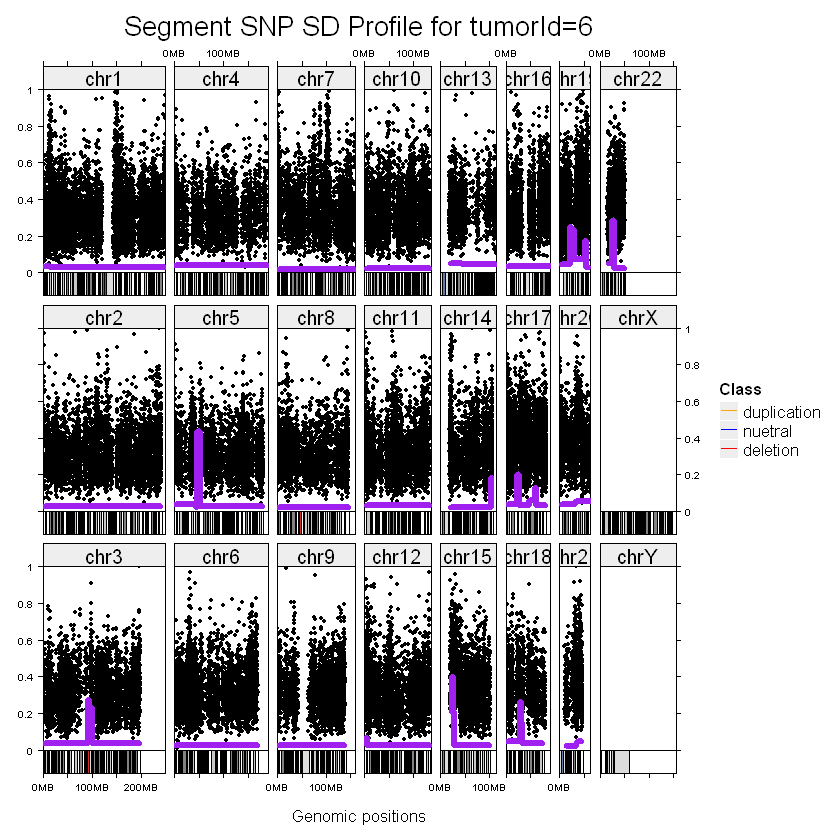

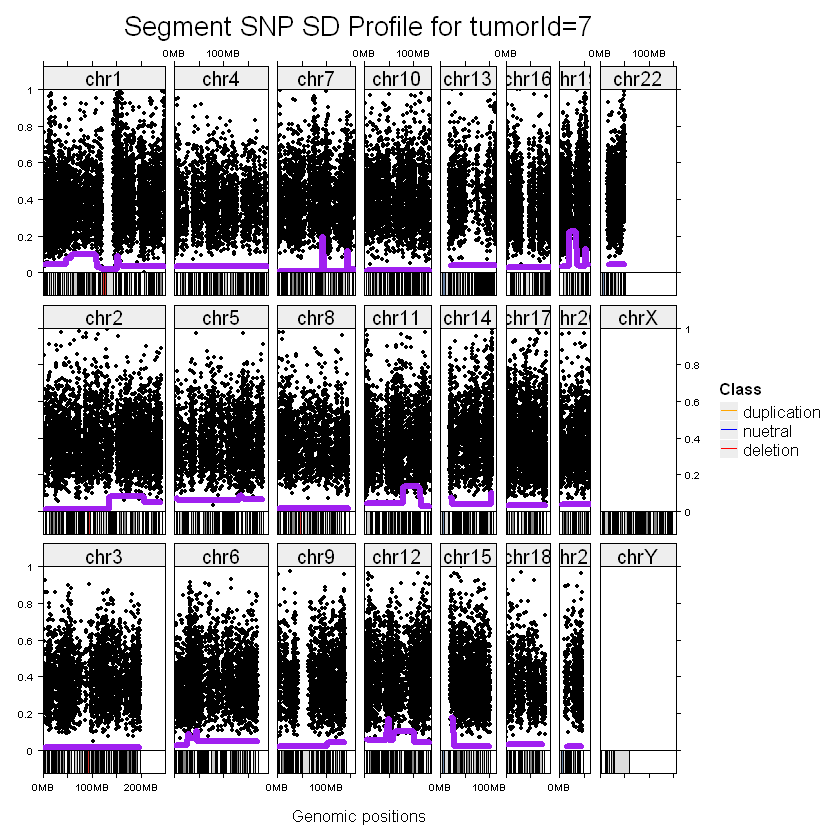

In [2]:
visualizeSegmentAndSnpSDAllTumor <- function() {
  setwd(paste0("~/Documents/Git-Projects/Git-Research-Projects/FACETS_nonmatching_test/"))
  for(tumorId in seq(2, 7)){
    seg_sd_bed <- calculateSegmentSD(tumorId)
    snp_sd_bed <- calculateSnpSD(tumorId)
    visualizeCNProfile(title = paste0("Segment SNP SD Profile for tumorId=", tumorId), facets_snp_data = snp_sd_bed, line_data = seg_sd_bed, save = FALSE, ymin = 0, ymax = 1)
  }
}

visualizeSegmentAndSnpSDAllTumor()

### Visualize RMSE of SNP and segments for all tumors

The RMSE between SNPs average around 0.40 (compared to an average SD of 0.30). The increased RMSE from SD indicates some bias from the non-matching samples, which is expected.

The RMSE between segments average around 0.07 (compared to an average SD of 0.05). The increased RMSE from SD also indicates bias from the non-matching samples, which is also expected. 

Again, considering that our current FACETS threshold for calling events are 0.2 for amplifications and -0.23 for deletions, an average RMSE of 0.07 is likely to cause false positives and false negatives.

NOTE: It is interesting to compare these variation plot with the CN Profile and CORE visualization in the "Visualize CORES of FACETS results on TCGA dataset" notebook. We can see how minor variations in the data can still cause FP and FN, yet major variations will have the same call due to its nuetrality. 

[1] "The mean RMSE for segments of tumorId=2 is MRMSE=0.0635130675047514"
[1] "The mean RMSE for SNPs of tumorId=2 is MRMSE=0.397946490411147"
[1] "The mean RMSE for segments of tumorId=3 is MRMSE=0.0810457727782751"
[1] "The mean RMSE for SNPs of tumorId=3 is MRMSE=0.420153253827314"


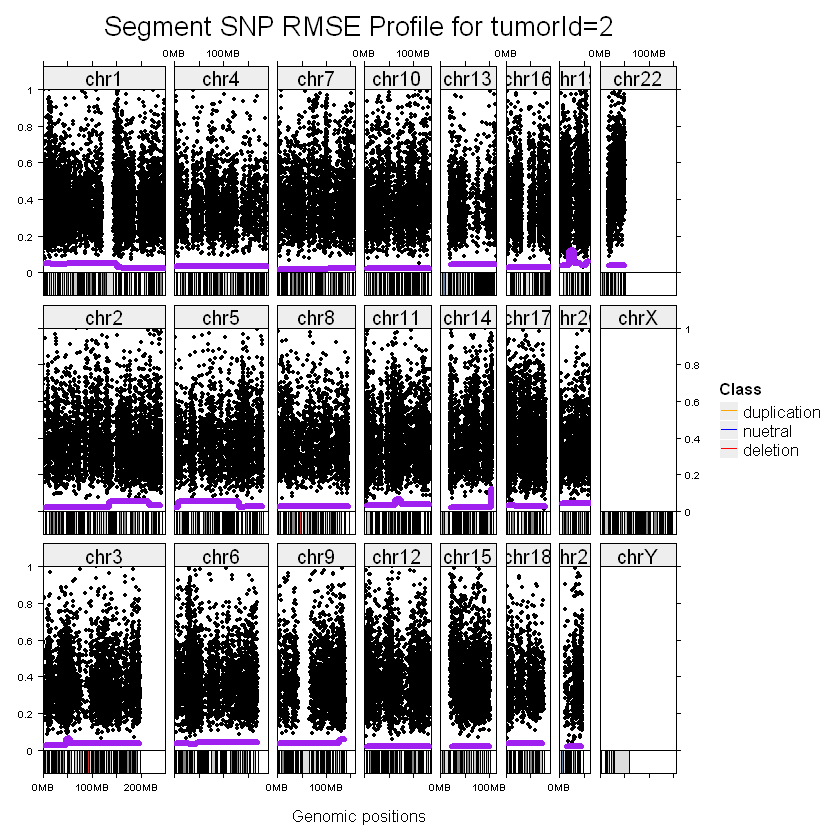

[1] "The mean RMSE for segments of tumorId=4 is MRMSE=0.0705713328068788"
[1] "The mean RMSE for SNPs of tumorId=4 is MRMSE=0.394403098498076"


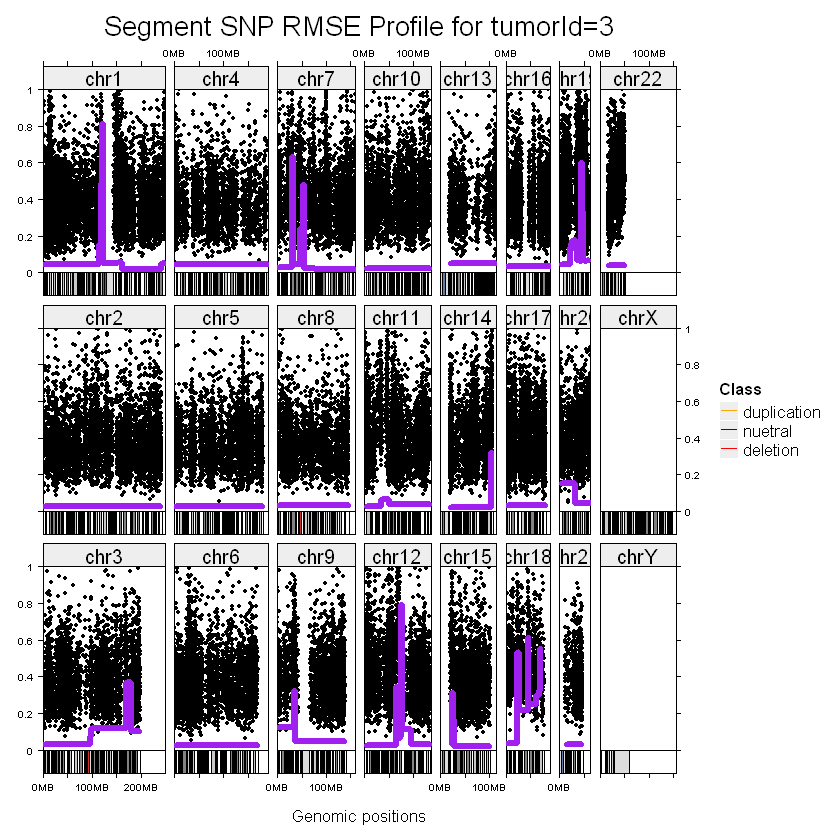

[1] "The mean RMSE for segments of tumorId=5 is MRMSE=0.0858657335733233"
[1] "The mean RMSE for SNPs of tumorId=5 is MRMSE=0.465614776978481"


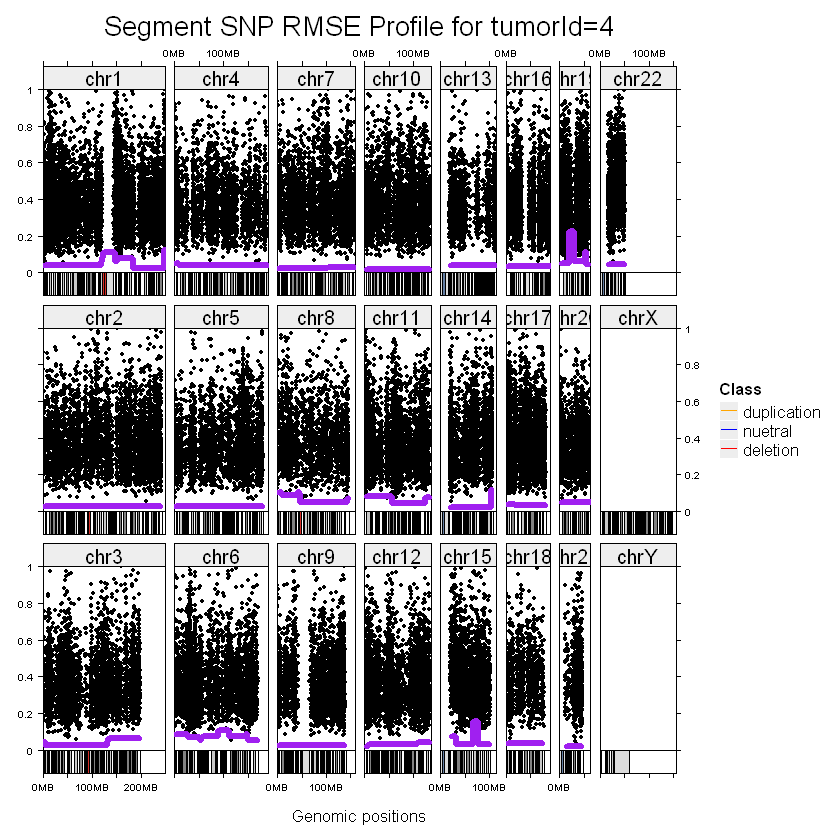

[1] "The mean RMSE for segments of tumorId=6 is MRMSE=0.0760666354609545"
[1] "The mean RMSE for SNPs of tumorId=6 is MRMSE=0.438002262341656"


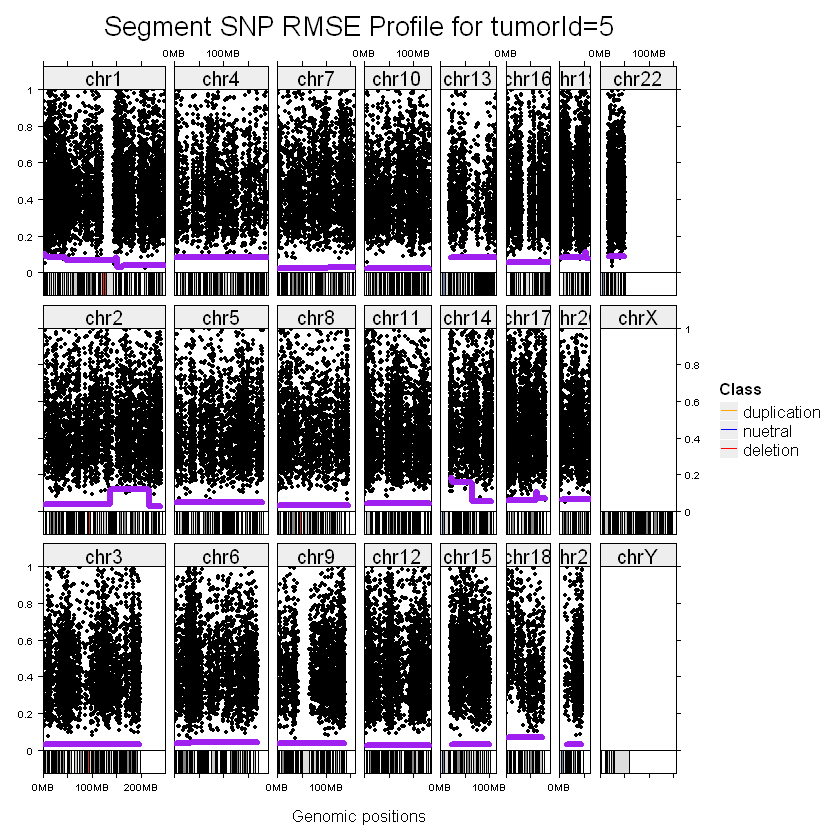

[1] "The mean RMSE for segments of tumorId=7 is MRMSE=0.0978650416994333"
[1] "The mean RMSE for SNPs of tumorId=7 is MRMSE=0.461909150315362"


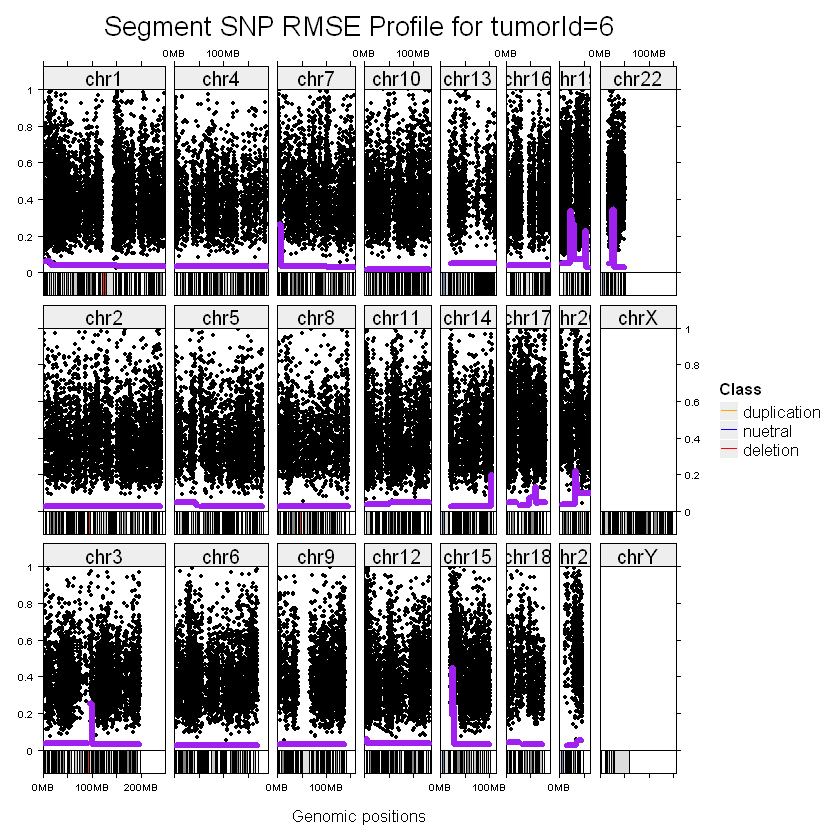

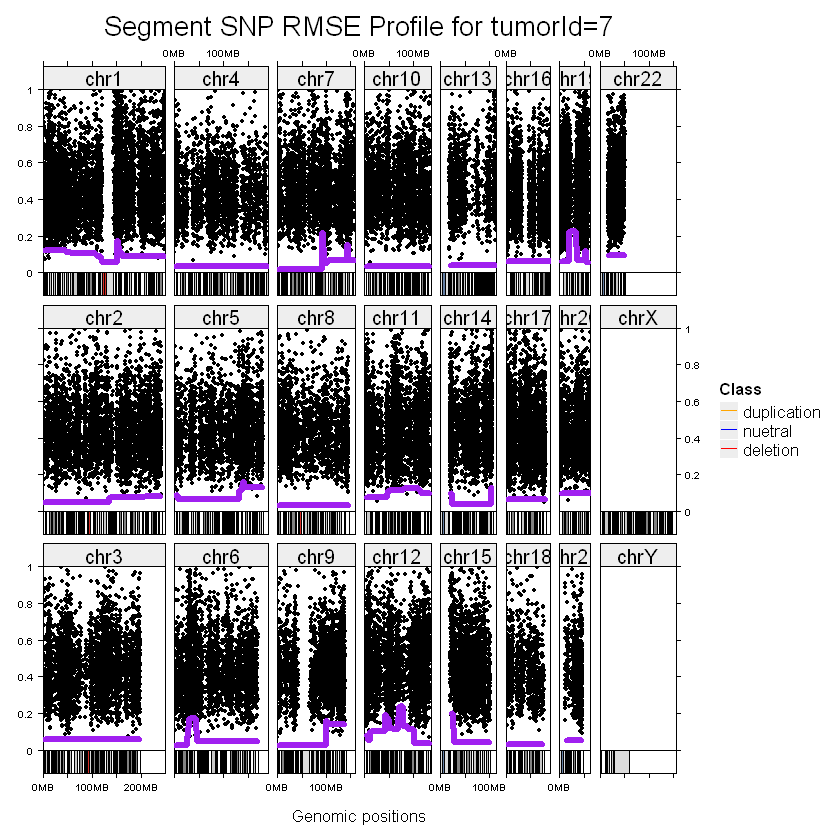

In [4]:
options(warn=-1)
visualizeSegmentAndSnpRMSEAllTumor <- function() {
  setwd(paste0("~/Documents/Git-Projects/Git-Research-Projects/FACETS_nonmatching_test/"))
  for(tumorId in seq(2, 7)){
    seg_rmse_bed <- calculateSegmentRMSE(tumorId)
    snp_rmse_bed <- calculateSnpRMSE(tumorId)
    visualizeCNProfile(title = paste0("Segment SNP RMSE Profile for tumorId=", tumorId), facets_snp_data = snp_rmse_bed, line_data = seg_rmse_bed, save = FALSE, ymin = 0, ymax = 1)
  }
}

visualizeSegmentAndSnpRMSEAllTumor()
